<a href="https://colab.research.google.com/github/mborkhat/DeepLearningExcercise/blob/master/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR100

In [13]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
from keras.datasets import cifar100

(X_train,y_train),(X_test,y_test)=cifar100.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [9]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(100)
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [5]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=optimizer)

In [11]:
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 4.5823 - accuracy: 0.0154 - val_loss: 4.4838 - val_accuracy: 0.0275
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 4.2455 - accuracy: 0.0518 - val_loss: 4.0859 - val_accuracy: 0.0762
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.9423 - accuracy: 0.1004 - val_loss: 3.8768 - val_accuracy: 0.1143
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.7299 - accuracy: 0.1391 - val_loss: 3.6694 - val_accuracy: 0.1521
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.5652 - accuracy: 0.1673 - val_loss: 3.5498 - val_accuracy: 0.1681
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.4194 - accuracy: 0.1919 - val_loss: 3.4368 - val_accuracy: 0.1869
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.2849 - accuracy: 0.2137 - val_loss: 3.3274 - val_accuracy:

313/313 - 1s - loss: 2.6674 - accuracy: 0.3660


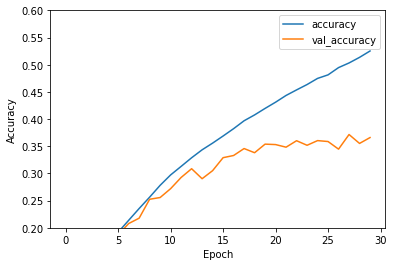

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2,0.6])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

Fashion MNIST

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [16]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [17]:
X_train=X_train.reshape(60000,28*28*1)
X_test=X_test.reshape(10000,28*28*1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocessing
X_train/=255.0
X_test/=255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [19]:
initializers=tf.keras.initializers.glorot_normal()

model=tf.keras.models.Sequential([
tf.keras.layers.Dense(1024,input_dim=784,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(512,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(256,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(10,kernel_initializer=initializers,bias_initializer=initializers,activation='softmax')])

#compile
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6497 - accuracy: 0.7818 - val_loss: 0.4977 - val_accuracy: 0.8246
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4488 - accuracy: 0.8427 - val_loss: 0.4419 - val_accuracy: 0.8434
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4034 - accuracy: 0.8573 - val_loss: 0.4138 - val_accuracy: 0.8528
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3738 - accuracy: 0.8673 - val_loss: 0.4033 - val_accuracy: 0.8549
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3517 - accuracy: 0.8751 - val_loss: 0.3822 - val_accuracy: 0.8614
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3351 - accuracy: 0.8788 - val_loss: 0.3639 - val_accuracy: 0.8698
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3187 - accuracy: 0.8863 - val_loss: 0.3566 - val_accuracy:

313/313 - 1s - loss: 0.3367 - accuracy: 0.8781


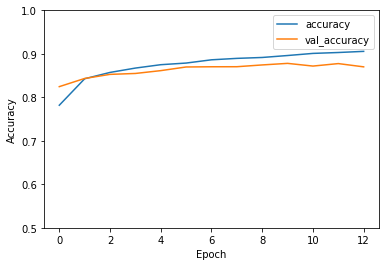

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

MNIST

In [21]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.utils import to_categorical

(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape(60000,28*28*1)
X_test=X_test.reshape(10000,28*28*1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocessing
X_train/=255.0
X_test/=255.0


11493376/11490434 [==============================] - 0s 0us/step


In [22]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [23]:
initializers=tf.keras.initializers.glorot_normal()
model=tf.keras.models.Sequential([
tf.keras.layers.Dense(1024,input_dim=784,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(512,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(256,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(10,kernel_initializer=initializers,bias_initializer=initializers,activation='softmax')])

In [24]:

#compile
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5214 - accuracy: 0.8626 - val_loss: 0.2545 - val_accuracy: 0.9281
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2279 - accuracy: 0.9346 - val_loss: 0.1857 - val_accuracy: 0.9457
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1738 - accuracy: 0.9493 - val_loss: 0.1527 - val_accuracy: 0.9553
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1393 - accuracy: 0.9600 - val_loss: 0.1491 - val_accuracy: 0.9554
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1158 - accuracy: 0.9668 - val_loss: 0.1157 - val_accuracy: 0.9660
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0976 - accuracy: 0.9723 - val_loss: 0.1043 - val_accuracy: 0.9678
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0841 - accuracy: 0.9761 - val_loss: 0.0944 - val_accuracy: